In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# Data preprocessing

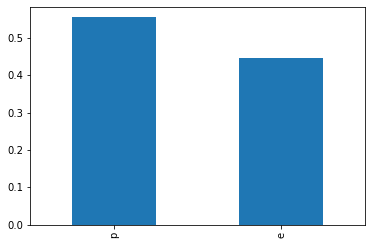

In [11]:
# class
df['class'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [12]:
# Changing class names to numbers e (edibile) to 1 and p (poisonous) to 0
df['class'] = df['class'].replace({'e': 1, 'p':0}).astype('int8')

### 1/20 Cap-diameter (float number in cm)

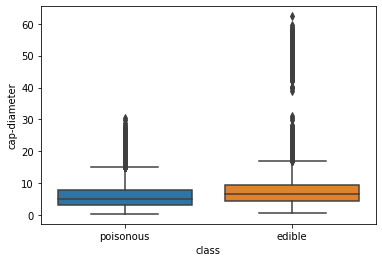

In [13]:
g=sns.boxplot(x='class', y='cap-diameter', data=df)
g.set(xticklabels=('poisonous', 'edible'))
plt.show()

### 2/20 Cap-shape

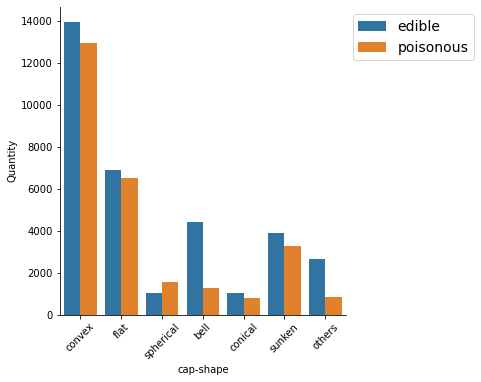

In [14]:
g=sns.catplot(x='cap-shape', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-shape" ,ylabel = 'Quantity', 
      xticklabels=('convex', 'flat', 'spherical', 'bell', 'conical', 'sunken', 'others'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 3/20 Cap-surface

In [15]:
df['cap-surface'].value_counts(normalize=True)

t    0.174572
s    0.162048
y    0.135061
h    0.105945
g    0.100620
d    0.094400
e    0.055038
k    0.049053
i    0.047392
w    0.045794
l    0.030075
Name: cap-surface, dtype: float64

In [16]:
df['cap-surface'].isna().sum()

14120

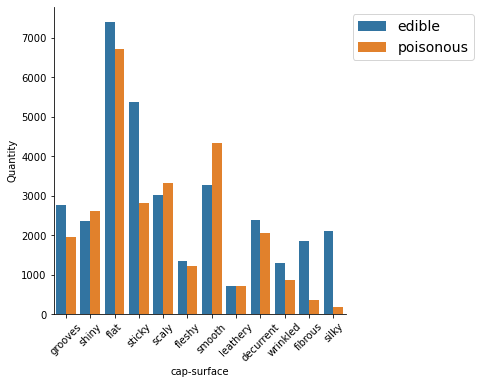

In [17]:
# changing Nan's to zeros and pelacing to none info = f
df['cap-surface'] = df['cap-surface'].fillna(0).replace({0: 'f'})
g=sns.catplot(x='cap-surface', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-surface" ,ylabel = 'Quantity', 
      xticklabels=('grooves', 'shiny', 'flat', 'sticky', 'scaly', 'fleshy', 
                   'smooth', 'leathery', 'decurrent', 'wrinkled', 'fibrous', 'silky'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [18]:
df['cap-surface'].isna().sum()

0

### 4/20 cap-color

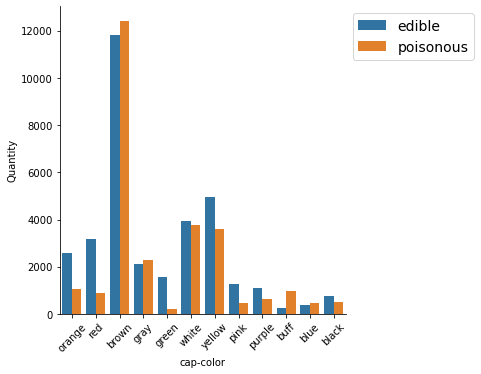

In [19]:
g=sns.catplot(x='cap-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "cap-color" ,ylabel = 'Quantity', xticklabels=('orange', 'red', 'brown', 
    'gray', 'green', 'white', 'yellow', 'pink', 'purple', 'buff', 'blue', 'black'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 5/20 does_bruise_or_bleed: bruises-or-bleeding=true, no=false

<Figure size 1152x864 with 0 Axes>

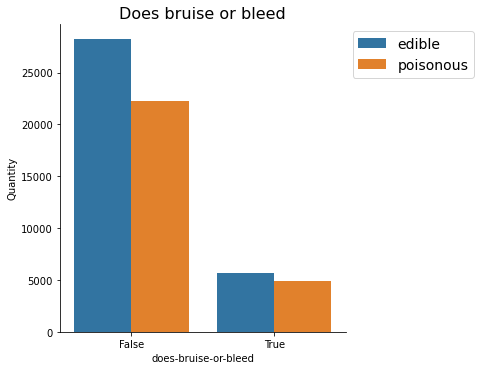

In [20]:
plt.figure(figsize=(16,12))
g = sns.catplot(x='does-bruise-or-bleed', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "does-bruise-or-bleed" ,ylabel = 'Quantity', xticklabels=('False', 'True'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Does bruise or bleed', fontsize=16)
plt.show()

### 6/20 Gill-attachment

In [21]:
set(df['gill-attachment'])

{'a', 'd', 'e', 'f', nan, 'p', 's', 'x'}

In [22]:
df['gill-attachment'].value_counts(normalize=True)

a    0.248080
d    0.200195
x    0.144828
p    0.117241
e    0.110345
s    0.110345
f    0.068966
Name: gill-attachment, dtype: float64

In [23]:
df['gill-attachment'].isna().sum()

9884

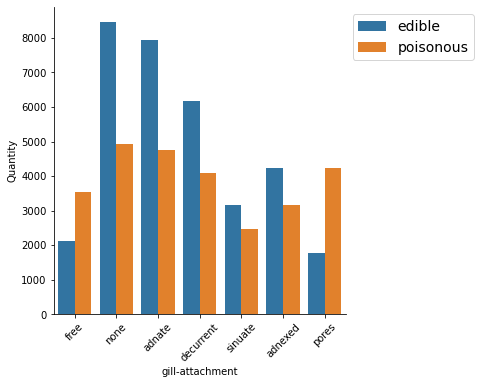

In [24]:
# changing Nan's to zeros and pelacing to none = f
df['gill-attachment'] = df['gill-attachment'].fillna(0).replace({0: 'f'})
g = sns.catplot(x='gill-attachment', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "gill-attachment" ,ylabel = 'Quantity', 
      xticklabels=('free', 'none', 'adnate', 'decurrent', 'sinuate', 'adnexed', 'pores'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

In [25]:
df['gill-attachment'].isna().sum()

0

### 7/20 Gill-spacing:  close=c, distant=d, none=f

In [26]:
set(df['gill-spacing'])

{'c', 'd', 'f', nan}

In [27]:
df['gill-spacing'].value_counts(normalize=True)

c    0.686275
d    0.215686
f    0.098039
Name: gill-spacing, dtype: float64

In [28]:
df['gill-spacing'].isna().sum()

25063

<Figure size 1152x864 with 0 Axes>

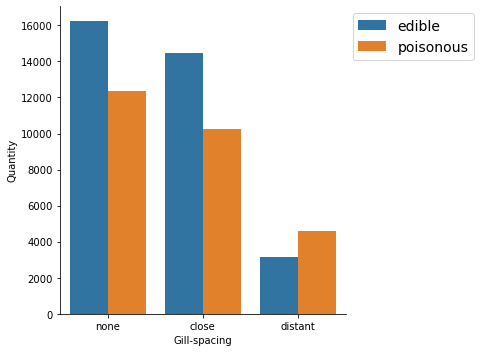

In [29]:
# changing Nan's to zeros and pelacing to none - f
df['gill-spacing'] = df['gill-spacing'].fillna(0).replace({0: 'f'})
plt.figure(figsize=(16,12))
g = sns.catplot(x='gill-spacing', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "Gill-spacing" ,ylabel = 'Quantity', xticklabels=('none', 'close', 'distant'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
df['gill-spacing'].isna().sum()

0

### 8/20 gill-color

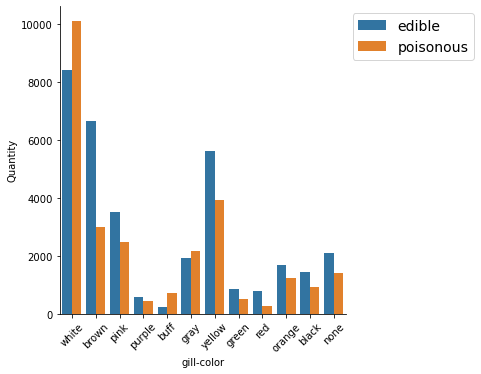

In [31]:
g=sns.catplot(x='gill-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "gill-color" ,ylabel = 'Quantity', xticklabels=('white', 'brown', 'pink', 'purple', 'buff', 'gray', 
                                'yellow', 'green', 'red',  'orange', 'black', 'none'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 9-10/20 stem-height (in cm) and stem-width (in mm)

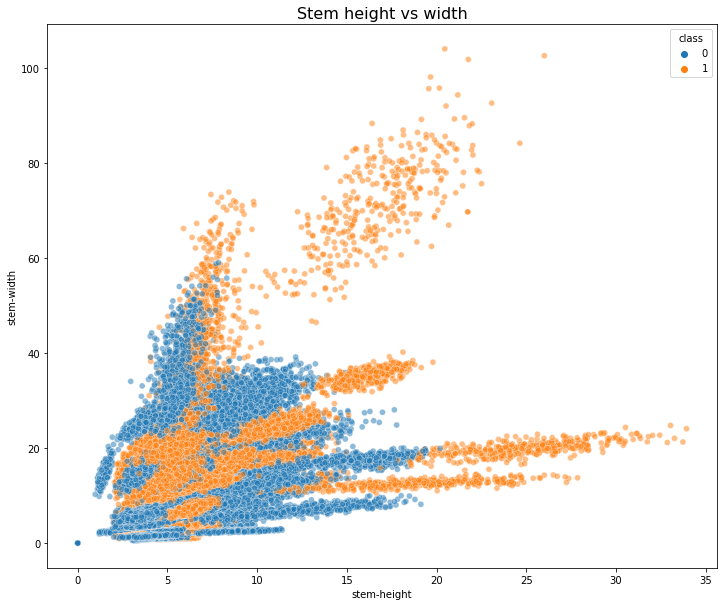

In [32]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='stem-height', y='stem-width', data=df, hue='class', alpha=0.5)
plt.title('Stem height vs width', fontsize=16)
plt.show()

### 11/20 stem-root

In [33]:
print("{:.1%} are Nan values in this column".format(df['stem-root'].isna().sum() / len(df['stem-root'])))

84.4% are Nan values in this column


### 12/20 stem-surface

In [34]:
print("{:.1%} are Nan values in this column".format(df['stem-surface'].isna().sum() / len(df['stem-surface'])))

62.4% are Nan values in this column


### 13/20 stem-color

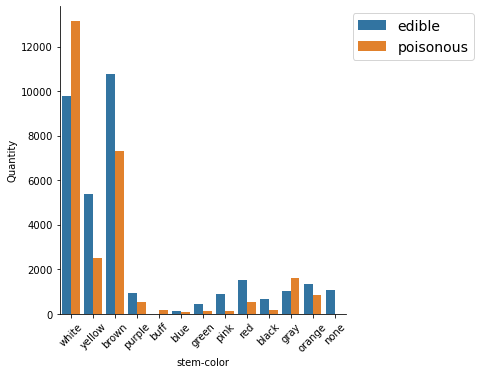

In [35]:
g=sns.catplot(x='stem-color', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "stem-color" ,ylabel = 'Quantity', xticklabels=('white', 'yellow', 'brown', 'purple', 'buff', 
                                                'blue', 'green', 'pink', 'red', 'black', 'gray', 'orange', 'none'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 14/20 veil-type:  partial=p, universal=u

In [36]:
df['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

In [37]:
# there are only values 'u'. Changing Nan to 0 and 'u' to 1
df['veil-type']=df['veil-type'].fillna(0)
df['veil-type'] = df['veil-type'].replace({'u': 1})
df['veil-type'].astype('int8')

0        1
1        1
2        1
3        1
4        1
        ..
61064    0
61065    0
61066    0
61067    0
61068    0
Name: veil-type, Length: 61069, dtype: int8

<Figure size 1152x864 with 0 Axes>

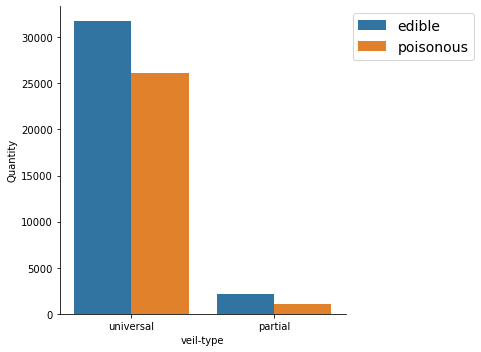

In [38]:
plt.figure(figsize=(16,12))
g = sns.catplot(x='veil-type', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "veil-type" ,ylabel = 'Quantity', xticklabels=('universal', 'partial'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 15/20 veil-color

In [39]:
print("{:.1%} are Nan values in this column".format(df['veil-color'].isna().sum() / len(df['veil-color'])))

87.9% are Nan values in this column


### 16/20 has-ring:  ring=t, none=f

<Figure size 1152x864 with 0 Axes>

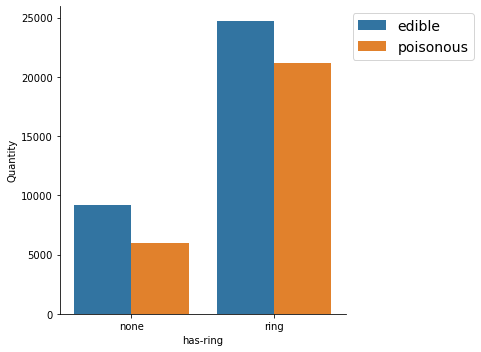

In [40]:
plt.figure(figsize=(16,12))
g = sns.catplot(x='has-ring', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "has-ring" ,ylabel = 'Quantity', xticklabels=('none', 'ring'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 17/20 ring-type

In [41]:
df['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [42]:
df['ring-type'].isna().sum()

2471

In [43]:
# changing Nan's to zeros and pelacing to none - f
df['ring-type']=df['ring-type'].fillna(0).replace({0: 'f'})
df['ring-type'].isna().sum()

0

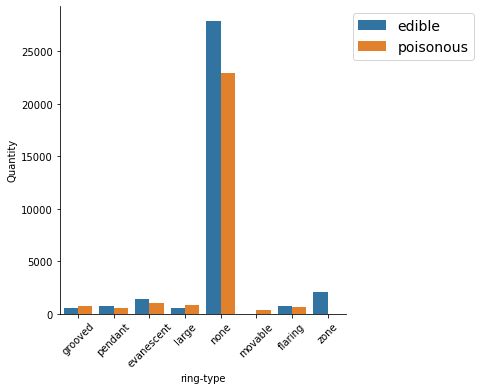

In [44]:
g=sns.catplot(x='ring-type', data=df, kind='count', hue='class', legend=None)
g.set(xlabel= "ring-type" ,ylabel = 'Quantity', 
      xticklabels=('grooved', 'pendant', 'evanescent', 'large', 'none', 'movable', 'flaring', 'zone'))
plt.xticks(rotation=45)
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 18/20 spore-print-color 

In [45]:
print("{:.1%} are Nan values in this column".format(df['spore-print-color'].isna().sum() / len(df['spore-print-color'])))

89.6% are Nan values in this column


### 19/20 habitat

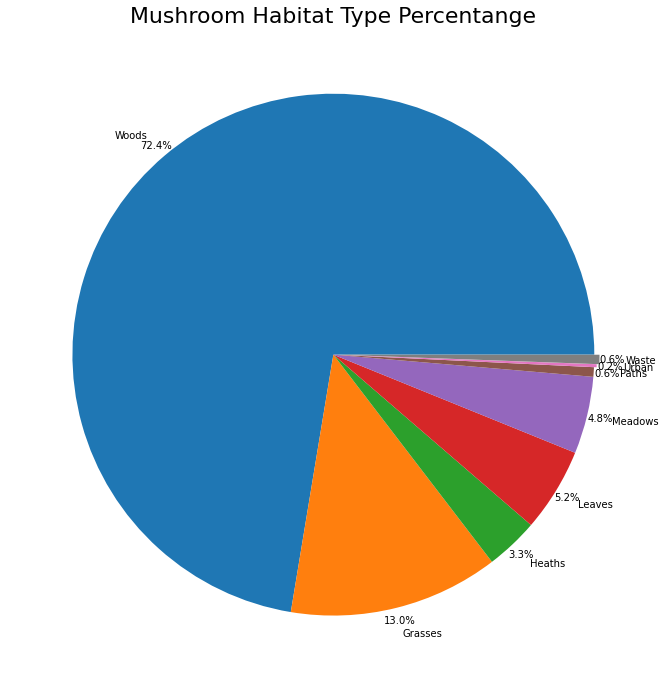

In [46]:
hab = dict(df.groupby('habitat')['habitat'].count())
labels = ['Woods', 'Grasses', 'Heaths', 'Leaves', 'Meadows', 'Paths','Urban', 'Waste']
values = hab.values()
plt.figure(figsize=(12,12))
explode = [0,0.,0,0,0, 0, 0.01, 0.02]
plt.pie(data=df, x=values, labels= labels, explode=explode, autopct = '%1.1f%%', pctdistance=1.05)
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
plt.show()

### 20/20 season

<Figure size 1152x864 with 0 Axes>

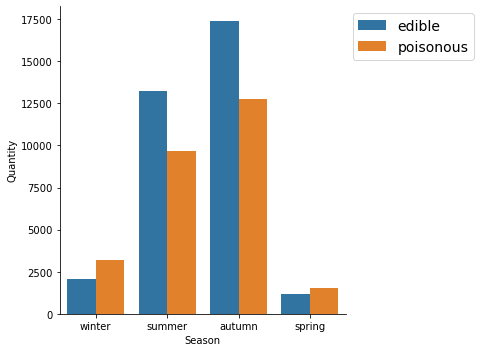

In [47]:
plt.figure(figsize=(16,12))
g = sns.catplot(x='season', data=df, kind='count', hue='class', legend=False)
g.set(xlabel= "Season" ,ylabel = 'Quantity', xticklabels=('winter', 'summer', 'autumn', 'spring'))
plt.legend(labels=['edible','poisonous'], fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [48]:
# dropping four columns where are Nan's
df.drop(['stem-root', 'veil-color','spore-print-color', 'stem-surface'], axis=1, inplace=True)

<AxesSubplot:>

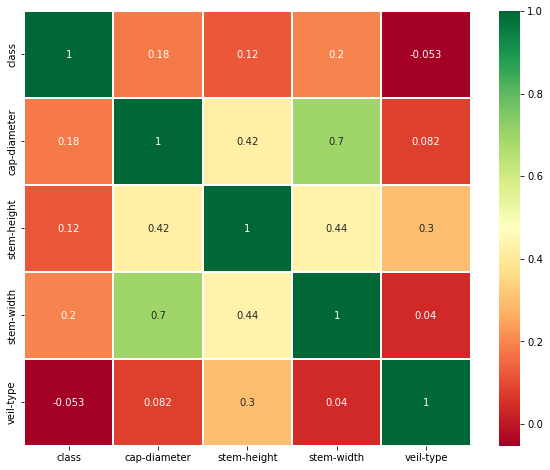

In [49]:
# korelacja dla kolumn o danych numerycznych
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.05)
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int8   
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  veil-type             61069 non-null  int64  
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

In [51]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'veil-type', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')

## One Hot Encoding on string data

In [52]:
ohe = pd.get_dummies(data=df, columns=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
        'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring','ring-type', 'habitat', 'season'])

In [53]:
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   61069 non-null  int8   
 1   cap-diameter            61069 non-null  float64
 2   stem-height             61069 non-null  float64
 3   stem-width              61069 non-null  float64
 4   veil-type               61069 non-null  int64  
 5   cap-shape_b             61069 non-null  uint8  
 6   cap-shape_c             61069 non-null  uint8  
 7   cap-shape_f             61069 non-null  uint8  
 8   cap-shape_o             61069 non-null  uint8  
 9   cap-shape_p             61069 non-null  uint8  
 10  cap-shape_s             61069 non-null  uint8  
 11  cap-shape_x             61069 non-null  uint8  
 12  cap-surface_d           61069 non-null  uint8  
 13  cap-surface_e           61069 non-null  uint8  
 14  cap-surface_f           61069 non-null

In [54]:
y=ohe.pop('class')
X=ohe

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [57]:
# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
seed = 123
models =[("LR", LogisticRegression(random_state=seed)),("KNN",KNeighborsClassifier()), ("SVM", SVC(random_state=seed)),
         ("XGB", XGBClassifier(random_state=seed)), ("DTC", DecisionTreeClassifier()),
         ('ADA',AdaBoostClassifier(random_state=seed)), ("GB",GradientBoostingClassifier(random_state=seed))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = roc_auc_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
finalResults

[('RF', 1.0),
 ('XGB', 0.9996515978394837),
 ('KNN', 0.9993946200709951),
 ('DTC', 0.9979960640748766),
 ('GB', 0.9299116754980326),
 ('SVM', 0.9262127083022429),
 ('ADA', 0.7993764978453257),
 ('LR', 0.7839528437187784)]

## Checking the overfitting

In [68]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
knn=KNeighborsClassifier()
MSE_CV = - cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print('CV MSE: {:.5f}'.format(MSE_CV.mean()))
print('Train MSE: {:.5f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.5f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.00086
Train MSE: 0.00049
Test MSE: 0.00057


In [72]:
dtc=DecisionTreeClassifier()
MSE_CV = - cross_val_score(dtc, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
print('CV MSE: {:.5f}'.format(MSE_CV.mean()))
print('Train MSE: {:.5f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.5f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.00225
Train MSE: 0.00000
Test MSE: 0.00205


In [75]:
xgb=XGBClassifier(random_state=123)
MSE_CV = - cross_val_score(xgb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print('CV MSE: {:.6f}'.format(MSE_CV.mean()))
print('Train MSE: {:.6f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.6f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.000430
Train MSE: 0.000041
Test MSE: 0.000327


### CV MSE  >> Train MSE that means overfitting, beacause of high variance

## SVM hyperparameter tuning

In [69]:
svm=SVC(random_state=123)
MSE_CV = - cross_val_score(svm, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
print('CV MSE: {:.4f}'.format(MSE_CV.mean()))
print('Train MSE: {:.4f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.4f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.0788
Train MSE: 0.0726
Test MSE: 0.0716


#### CV MSE ~ Train MSE ~ Test MSE  - model is ok

AUC: 0.926


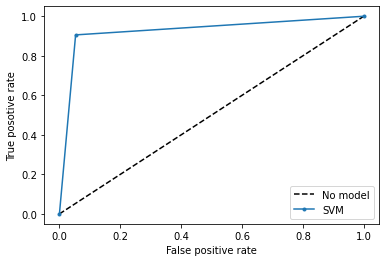

In [76]:
y_pred_svm = svm.predict(X_test)
fpr, tpr, thresholds=roc_curve(y_test, y_pred_svm)
auc=roc_auc_score(y_test, y_pred_svm)
print('AUC: %.3f' % auc)
plt.plot([0,1], [0,1], 'k--', label='No model')
plt.plot(fpr, tpr, marker='.', label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.legend()
plt.show()

In [77]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6745
           1       0.93      0.91      0.92      5469

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214



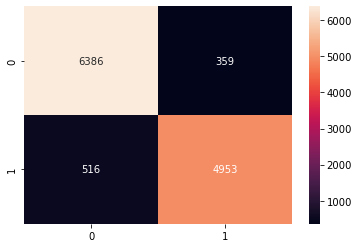

In [78]:
svm_cm=confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.show()

## GradientBoosting Clasiffier hyperparameter tuning

In [79]:
gb=GradientBoostingClassifier(random_state=123)
MSE_CV = - cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
print('CV MSE: {:.4f}'.format(MSE_CV.mean()))
print('Train MSE: {:.4f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.4f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 0.0680
Train MSE: 0.0652
Test MSE: 0.0685


#### CV MSE ~ Train MSE ~ Test MSE - model is ok

AUC: 0.930


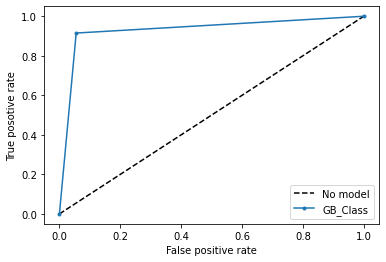

In [80]:
y_pred_gb = gb.predict(X_test)
fpr, tpr, thresholds=roc_curve(y_test, y_pred_gb)
auc=roc_auc_score(y_test, y_pred_gb)
print('AUC: %.3f' % auc)
plt.plot([0,1], [0,1], 'k--', label='No model')
plt.plot(fpr, tpr, marker='.', label='GB_Class')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.legend()
plt.show()

In [82]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6745
           1       0.93      0.91      0.92      5469

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214



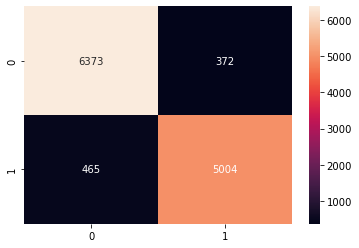

In [83]:
gb_cm=confusion_matrix(y_test, y_pred_gb)
sns.heatmap(gb_cm, annot=True, fmt='d')
plt.show()

In [81]:
# SUMMARY:
   # - KNeighborsClassifier, DecisionTreeClassifier, XGBClassifier - those models were overfitted
   # - SVM and GradientBoostingClassifier were ok